<a href="https://colab.research.google.com/github/mathy-analyst/Projet_Analyse_Ventes_2025/blob/main/Blinkit%20Analysis%20ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving blinkit_data.csv to blinkit_data (5).csv
(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usa

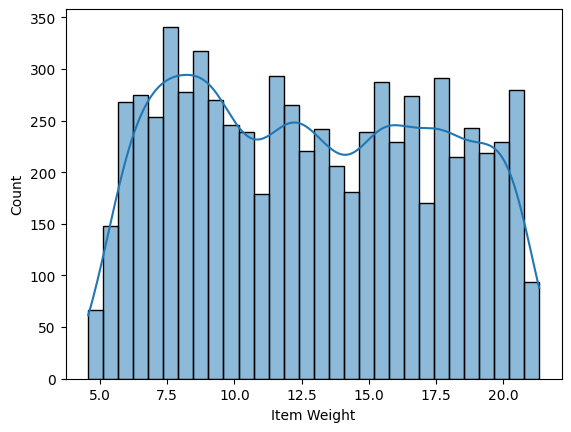

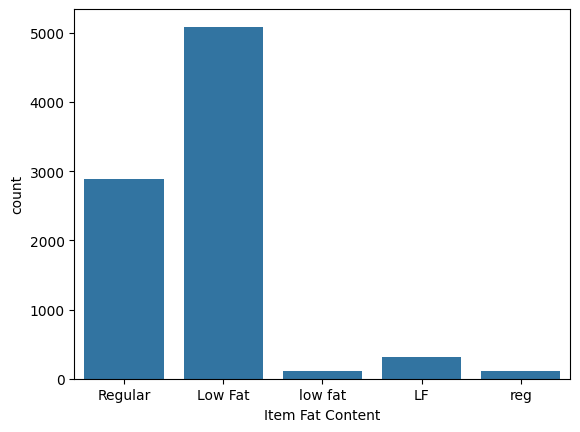

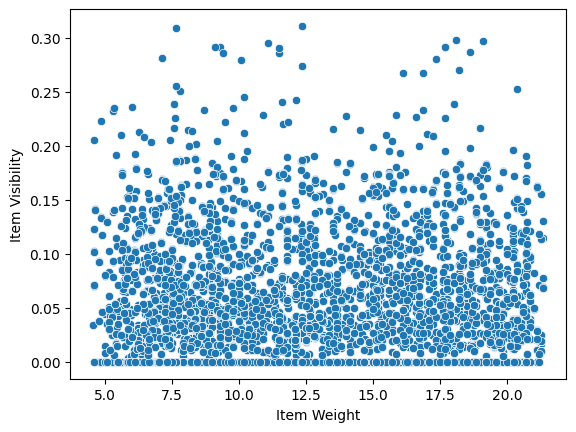

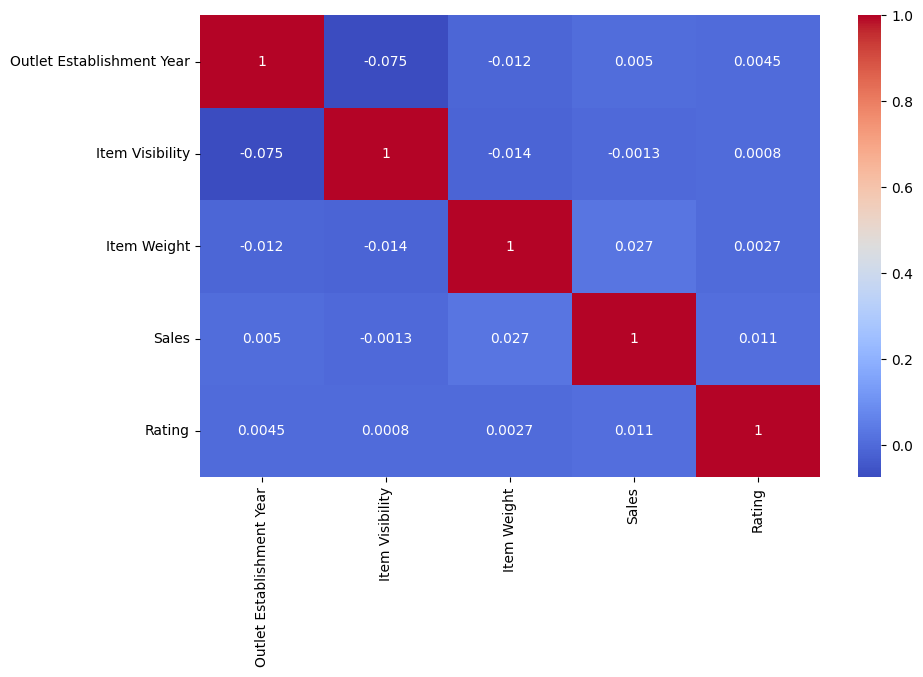

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import pandas as pd
# lancer l'upload (fenêtre va s'ouvrir)
uploaded = files.upload()
# lire le CSV
df = pd.read_csv("blinkit_data.csv")

print(df.shape)
df.head()
# Infos générales sur les colonnes
df.info()

# Statistiques descriptives
df.describe()

# Vérifier les valeurs manquantes
df.isnull().sum()
# Histogramme sur une variable numérique
sns.histplot(df['Item Weight'], bins=30, kde=True)
plt.show()
# Compter les catégories d’un champ
sns.countplot(x='Item Fat Content', data=df)
plt.show()

""" Module 4 : Analyse approfondie Objectifs :
     Croiser plusieurs variables.
    Identifier les relations et corrélations."""
# Relation entre poids et visibilité
sns.scatterplot(x='Item Weight', y='Item Visibility', data=df)
plt.show()
# Heatmap des corrélations
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()
"""Module 5 : Nettoyage et préparation des données:

Corriger les incohérences.
Gérer les valeurs manquantes.
Préparer les données pour la modélisation."""
# Remplacer les valeurs manquantes par la moyenne

df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())
# Normaliser une colonne catégorielle
print(df['Item Fat Content'].unique())
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})